<ipython-input-10-4ee1056c0101>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


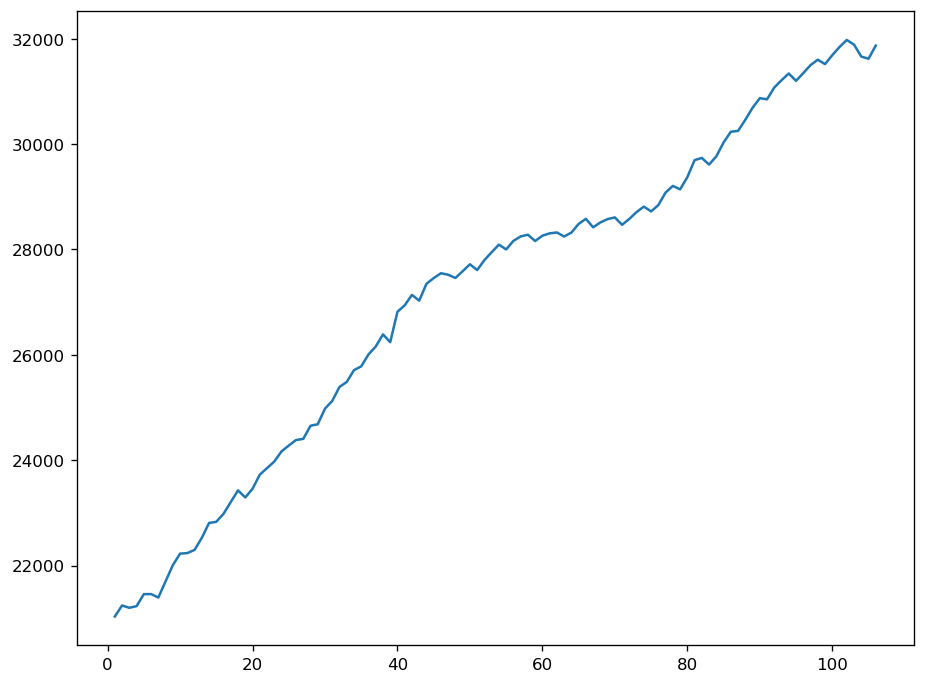

In [10]:
import pandas as pd
import numpy as np
# from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

main = pd.read_csv('./Practitioners-Challenge/main.csv')


main['time']= pd.to_datetime(main['Quarter'].str.replace(' ','-'))#.replace()pd.to_datetime(df['Quarter'])
main.head()
# main = main.set_index('time')
# main[' Cars'] = main[' Cars'].str.replace('..','')
cars = main[' Cars'].dropna(axis=0)
cars = cars[~cars.isin(['..'])]

cars = cars.astype('float')


plt.plot(cars)

# cars_num.columns


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

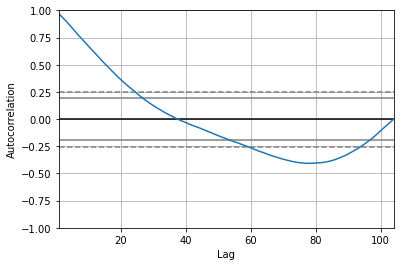

In [78]:
autocorrelation_plot(cars)

In [11]:
# get the suitable p -lag of predictors and q-lag of error
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cars)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

ADF Statistic: -2.313354
p-value: 0.167697


In [17]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(cars, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
#Best model:  ARIMA(3,2,0) #p,d,q

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1383.249, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1368.068, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1381.249, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1358.011, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=1295.108, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=1296.836, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1317.245, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1293.333, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1356.038, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1295.089, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1316.106, Time=0.12 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.010 seconds
                               S

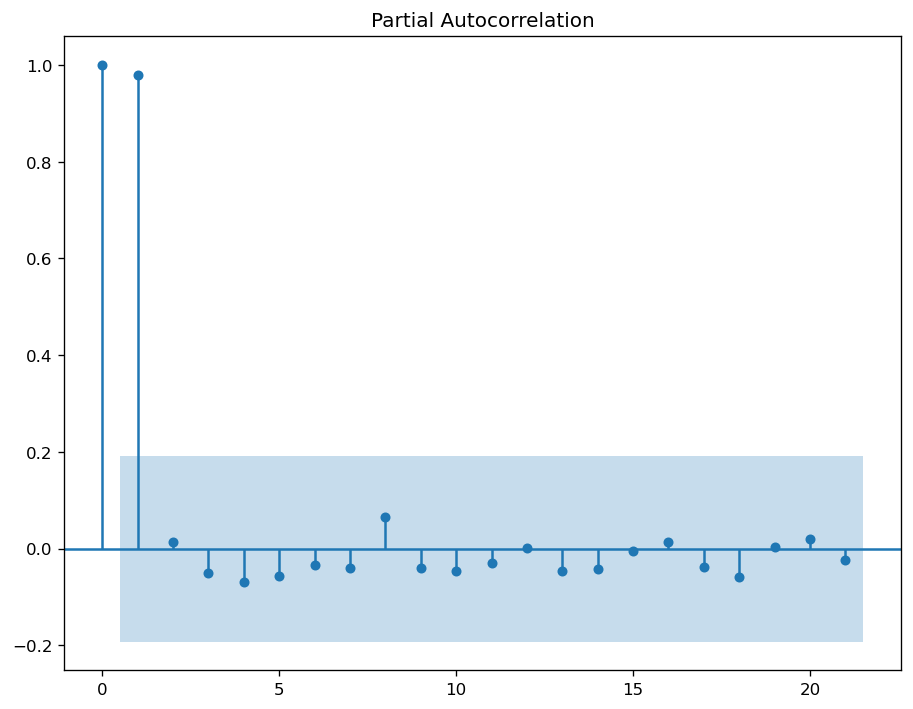

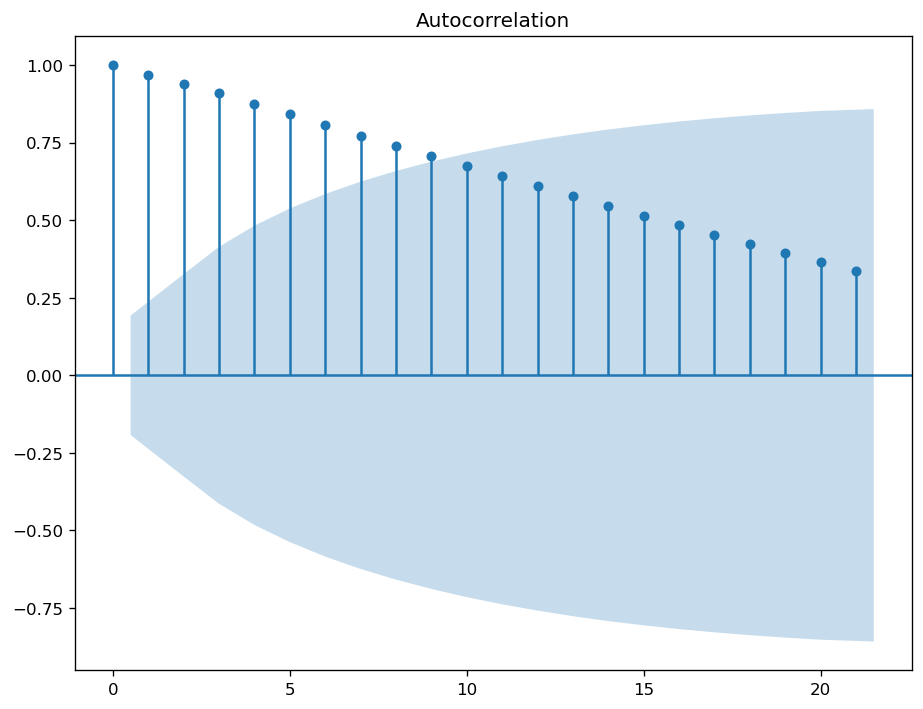

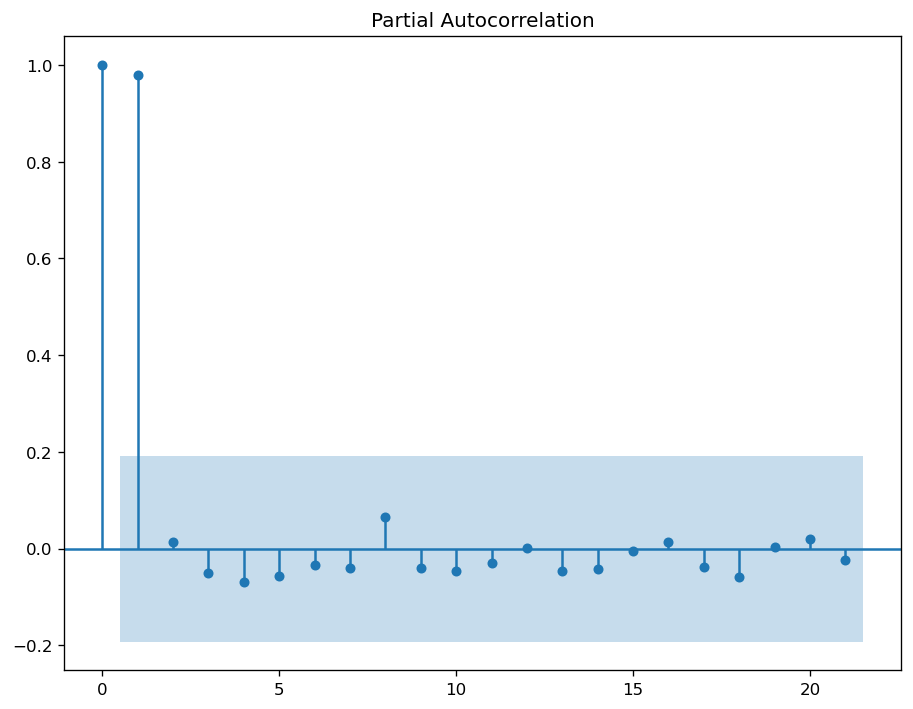

In [24]:
plot_acf(cars)
plot_pacf(cars)
# plot_acf(cars.diff())
# plot_pacf(cars.diff())

In [25]:
#build the arima
from statsmodels.tsa.arima_model import ARIMA

# 3,2,0 ARIMA Model
model = ARIMA(cars, order=(3,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2. Cars   No. Observations:                  102
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -637.260
Method:                       css-mle   S.D. of innovations            123.460
Date:                Fri, 19 Feb 2021   AIC                           1284.519
Time:                        02:44:32   BIC                           1297.644
Sample:                             2   HQIC                          1289.834
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1566      3.604     -0.321      0.748      -8.221       5.908
ar.L1.D2. Cars    -0.9006      0.072    -12.491      0.000      -1.042      -0.759
ar.L2.D2. Cars    -0.8347      0.081

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn

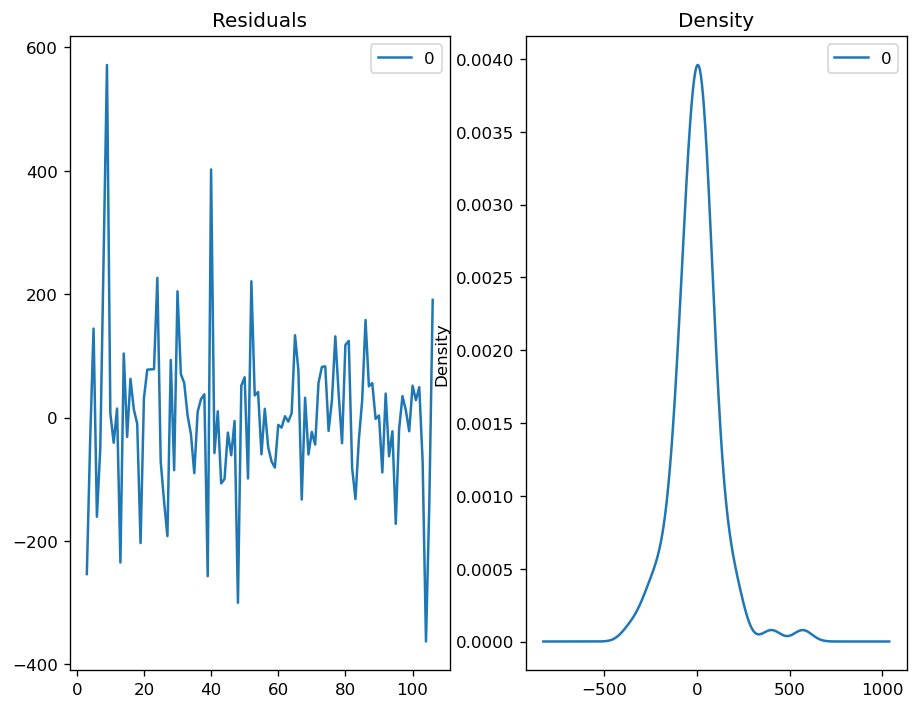

In [26]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

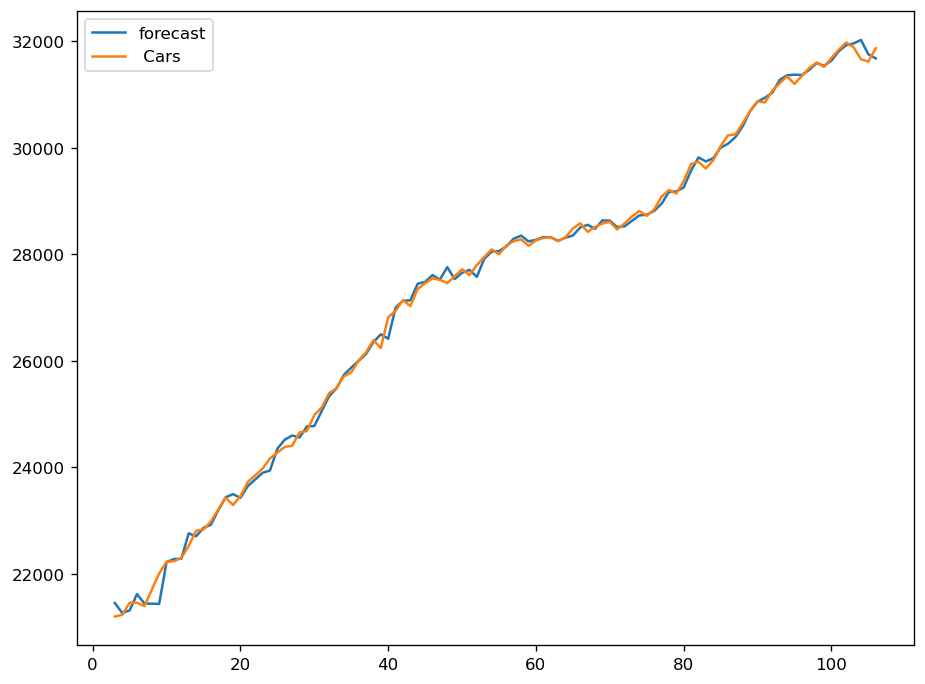

In [27]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
#predict
fc, se, conf = model_fit.forecast(4*10, alpha=0.05)  # 95% conf 

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn

                             ARIMA Model Results                              
Dep. Variable:               D2. Cars   No. Observations:                   67
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -423.121
Method:                       css-mle   S.D. of innovations            131.595
Date:                Fri, 19 Feb 2021   AIC                            856.241
Time:                        03:00:14   BIC                            867.265
Sample:                             2   HQIC                           860.603
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5036      4.735     -0.318      0.751     -10.784       7.777
ar.L1.D2. Cars    -0.9818      0.093    -10.529      0.000      -1.165      -0.799
ar.L2.D2. Cars    -0.8445      0.111

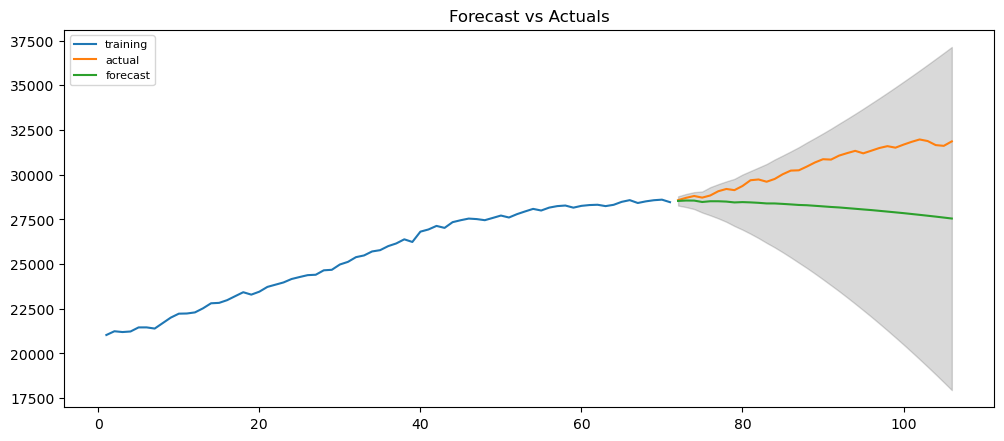

7.295545504861874

In [46]:
#if we spilit the data as training and testing data, and calculate the MAE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test = cars[np.round(2/3*len(cars)).astype(int):]
train = cars[:np.round(2/3*len(cars)).astype(int)]
model = ARIMA(train, order=(3,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Forecast
fc, se, conf = model_fit.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mean_absolute_percentage_error(test, fc) #7.295545504861874 acceptable

In [ ]:
#further arimax include other variable
#http://barnesanalytics.com/analyzing-multivariate-time-series-using-arimax-in-python-with-statsmodels